In [41]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, minimize
from iminuit.cost import UnbinnedNLL
from scipy import integrate

In [ ]:
data = np.genfromtxt("ParameterEstimation_Ex1.txt", delimiter = "\n")

def TheoFunc(x, b):
    return 1 + 0.65*x + b*x**2

pred_normalized = lambda x, beta: TheoFunc(x, beta) / integrate.quad(lambda x: TheoFunc(x, beta), -0.95, 0.95)[0]

def log_likelihood_poly(b, data):   
    data_points = pred_normalized(data, b)
    if np.any(data_points <= 0):
        return np.inf
    return -np.sum(np.log(data_points))
nll = UnbinnedNLL(data, log_likelihood_poly)

MLL_minimize = lambda b: log_likelihood_poly(b, data)
m = Minuit(MLL_minimize, b = 10)
m.migrad()

C:\Users\lorentsen\AppData\Local\Temp\ipykernel_121728\3261017432.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  pred_normalized = lambda x, beta: TheoFunc(x, beta) / integrate.quad(lambda x: TheoFunc(x, beta), -0.95, 0.95)[0]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1779                       │              Nfcn = 82               │
│ EDM = 1.47e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   0.88    │   0.14    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      b │
├───┼────────┤
│ b │ 0.0181 │
└───┴────────┘

In [146]:
data = np.genfromtxt("ParameterEstimation_Ex1.txt", delimiter = "\n")

def TheoFunc(x, a, b):
    return 1 + a*x + b*x**2

pred_normalized = lambda x, alpha, beta: TheoFunc(x, alpha, beta) / integrate.quad(lambda x: TheoFunc(x, alpha, beta), -0.95, 0.95)[0]

def log_likelihood_poly(a, b, data):   
    data_points = pred_normalized(data, a, b)
    if np.any(data_points <= 0):
        return np.inf
    return -np.sum(np.log(data_points))

def find_minimum(data, init_a, init_b):    
    MLL_minimize = lambda a, b: log_likelihood_poly(a, b, data)
    m = Minuit(MLL_minimize, a = init_a, b = init_b)
    m.migrad()
    return m

def samples(data, alpha, beta):
    sampled = np.zeros_like(data)
    x = np.random.uniform(-0.95, 0.95, size = len(data)*10)
    y = np.random.uniform(0, np.max(data), size = len(data)*10)
    actual_x = pred_normalized(x, alpha, beta)
    i, j = 0, 0
    while j < len(data):
        if y[i] < actual_x[i]:
            sampled[j] = x[i]
            j += 1
        i += 1
    return np.array(sampled)

a, b = find_minimum(data, 1, 1).values

alphas, betas = [], []
for i in range(500):
    alp, bet = find_minimum(samples(data, a, b), a, b).values
    alphas.append(alp)
    betas.append(bet)


In [ ]:
plt.style.use('seaborn-v0_8-colorblind')

colors = [plt.plot(1,1)[0].get_color() for _ in range(5)]
plt.close()


['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442']

Confidence interval for alpha: [0.584, 0.688]
Confidence interval for beta: [0.757, 0.969]


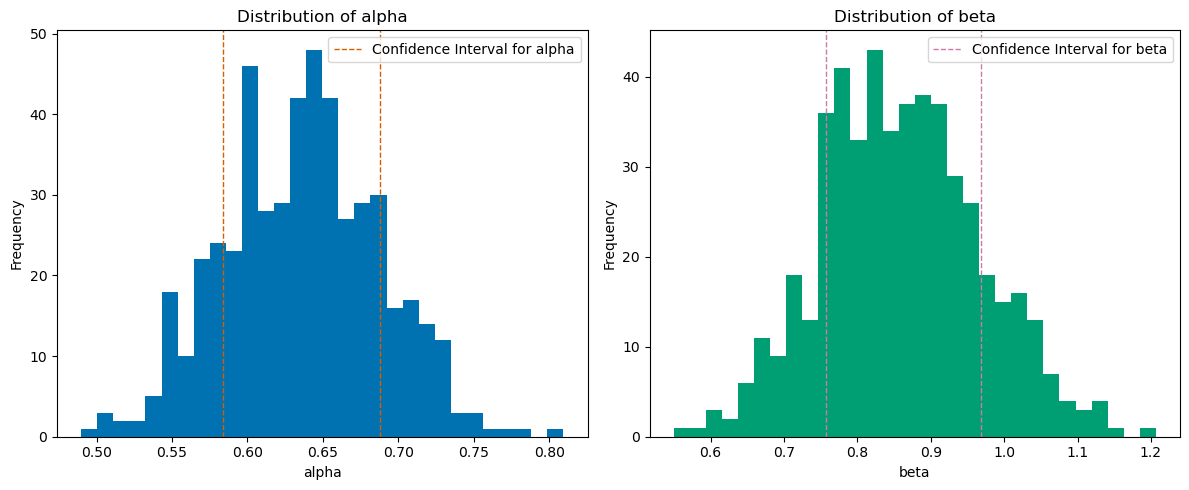

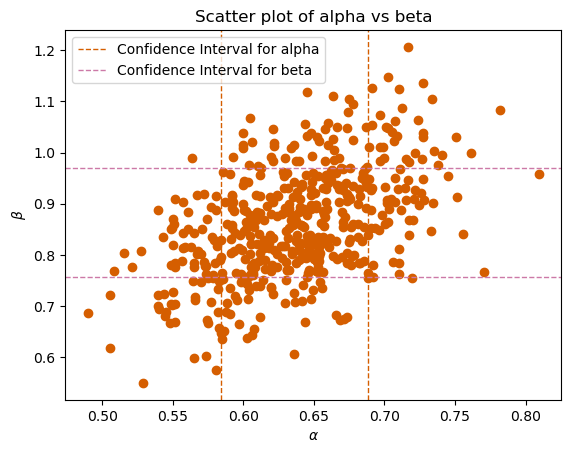

In [164]:
sorted_alphas, sorted_betas = np.sort(alphas), np.sort(betas)
CONFIDENCE_LEVEL = 0.16
a_min, a_max, b_min, b_max = (
    sorted_alphas[int(np.floor(CONFIDENCE_LEVEL * sorted_alphas.shape[0]))], 
    sorted_alphas[int(np.floor((1 - CONFIDENCE_LEVEL) * sorted_alphas.shape[0]))], 
    sorted_betas[int(np.floor(CONFIDENCE_LEVEL * sorted_betas.shape[0]))+1], 
    sorted_betas[int(np.floor((1 - CONFIDENCE_LEVEL) * sorted_betas.shape[0]))+1]
    )

print(f"Confidence interval for alpha: [{a_min:.3f}, {a_max:.3f}]")
print(f"Confidence interval for beta: [{b_min:.3f}, {b_max:.3f}]")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(alphas, bins=30, color = colors[0])
axs[0].set_title('Distribution of alpha')
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('Frequency')
axs[0].axvline(a_min, color=colors[2], linestyle='dashed', linewidth=1, label = 'Confidence Interval for alpha')
axs[0].axvline(a_max, color=colors[2], linestyle='dashed', linewidth=1)
axs[0].legend()
axs[1].hist(betas, bins=30, color = colors[1])
axs[1].set_title('Distribution of beta')
axs[1].set_xlabel('beta')
axs[1].set_ylabel('Frequency')
axs[1].axvline(b_min, color=colors[3], linestyle='dashed', linewidth=1, label = 'Confidence Interval for beta')
axs[1].axvline(b_max, color=colors[3], linestyle='dashed', linewidth=1)
axs[1].legend()
plt.tight_layout()
plt.show()

plt.scatter(alphas, betas, color = colors[2])
plt.axvline(a_min, color=colors[2], linestyle='dashed', linewidth=1, label = 'Confidence Interval for alpha')
plt.axvline(a_max, color=colors[2], linestyle='dashed', linewidth=1)
plt.axhline(b_min, color=colors[3], linestyle='dashed', linewidth=1, label = 'Confidence Interval for beta')
plt.axhline(b_max, color=colors[3], linestyle='dashed', linewidth=1)
plt.xlabel("$\\alpha$")
plt.ylabel("$\\beta$")
plt.title("Scatter plot of alpha vs beta")
plt.legend()
plt.show()


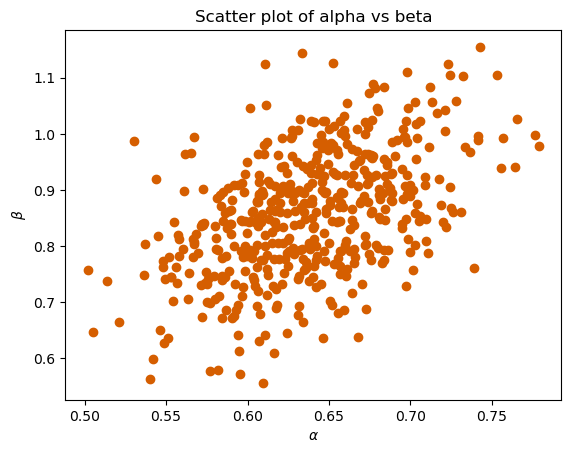

In [ ]:
plt.scatter(alphas, betas, color = colors[2])
plt.xlabel("$\\alpha$")
plt.ylabel("$\\beta$")
plt.title("Scatter plot of alpha vs beta");

In [ ]:
sorted_alphas, sorted_betas = np.sort(alphas), np.sort(betas)
CONFIDENCE_LEVEL = 0.15
a_min, a_max, b_min, b_max = (
    sorted_alphas[np.floor(CONFIDENCE_LEVEL * sorted_alphas.shape[0])], 
    sorted_alphas[np.floor((1 - CONFIDENCE_LEVEL) * sorted_alphas.shape[0])], 
    sorted_betas[np.floor(CONFIDENCE_LEVEL * sorted_betas.shape[0])+1], 
    sorted_betas[np.floor((1 - CONFIDENCE_LEVEL) * sorted_betas.shape[0])+1]
    )


IndentationError: unexpected indent (1365583789.py, line 4)